# Problem 1

**Use sentiment analysis on social media posts to gauge public opinion on various topics or brands.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/Tweets.csv"
df = pd.read_csv(path)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


##Total count of each sentiment

In [ ]:
df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

Neutral and positive sentiments are almost equal, while negative ones are way more.


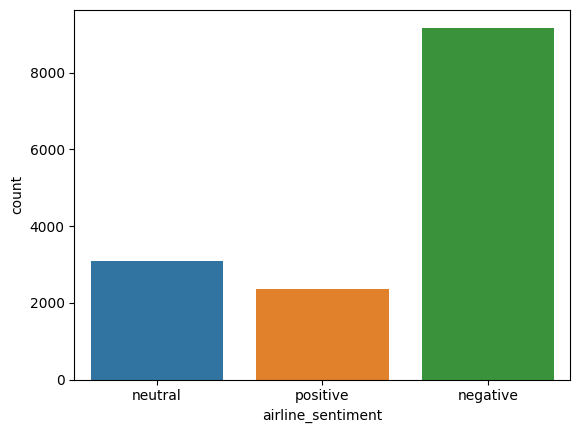

In [ ]:
ax = sns.countplot(x="airline_sentiment", data=df)
print("Neutral and positive sentiments are almost equal, while negative ones are way more.")

##Total counts of sentiments per airline

United Airlines has by far the most comments/sentiments in the dataset.


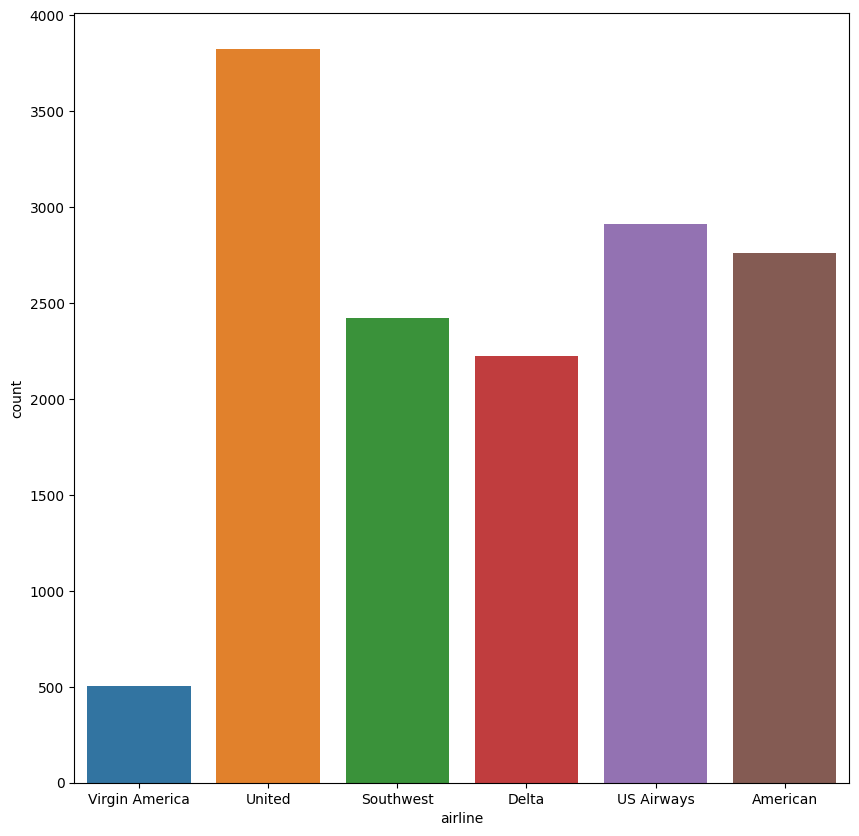

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=df)
print("United Airlines has by far the most comments/sentiments in the dataset.")

##Total counts of each sentiment per airline

United has the most negative comments while Virgin has the least.
On the other hand, Southwest has the most positive comments while Virgin has the least.


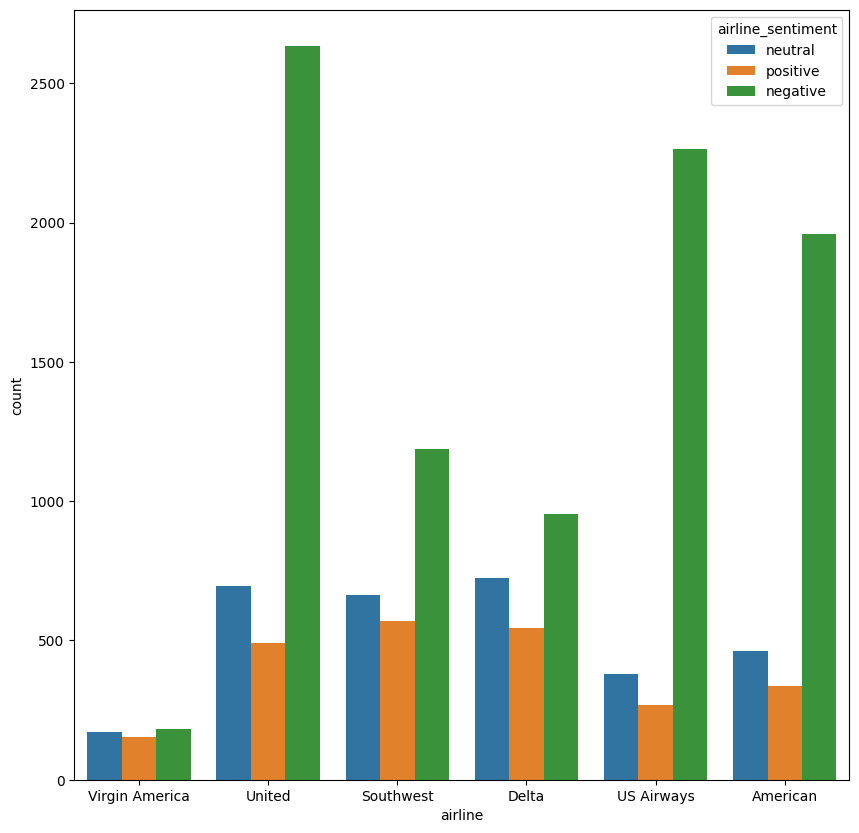

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(df, x="airline", hue="airline_sentiment")
print("""United has the most negative comments while Virgin has the least.
On the other hand, Southwest has the most positive comments while Virgin has the least.""")

##Most common negative reason

The most commong negative reason is bad Customer Service.


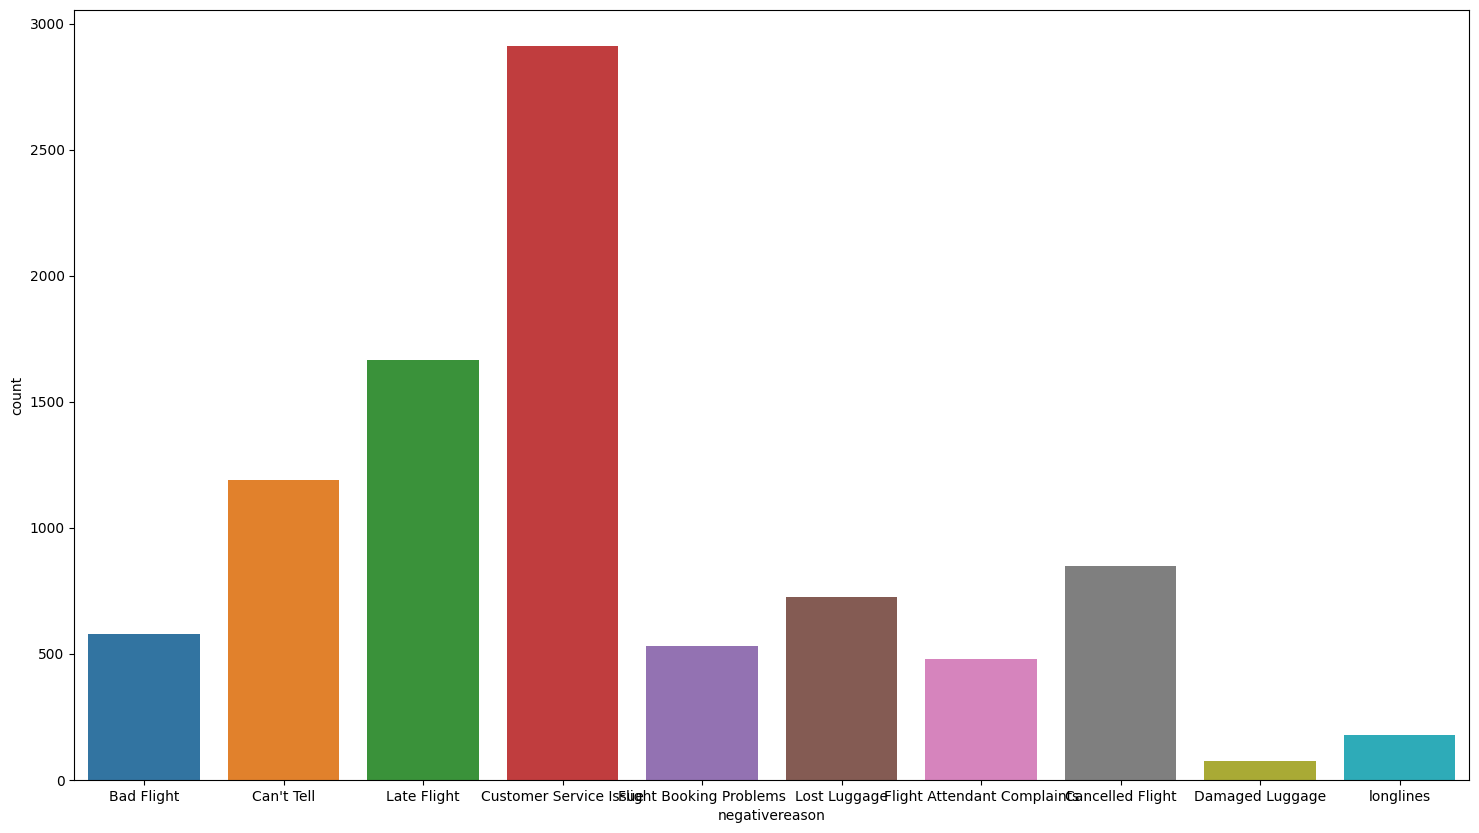

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x="negativereason", data=df)
print("The most commong negative reason is bad Customer Service.")

##Most common negative reason for each airline

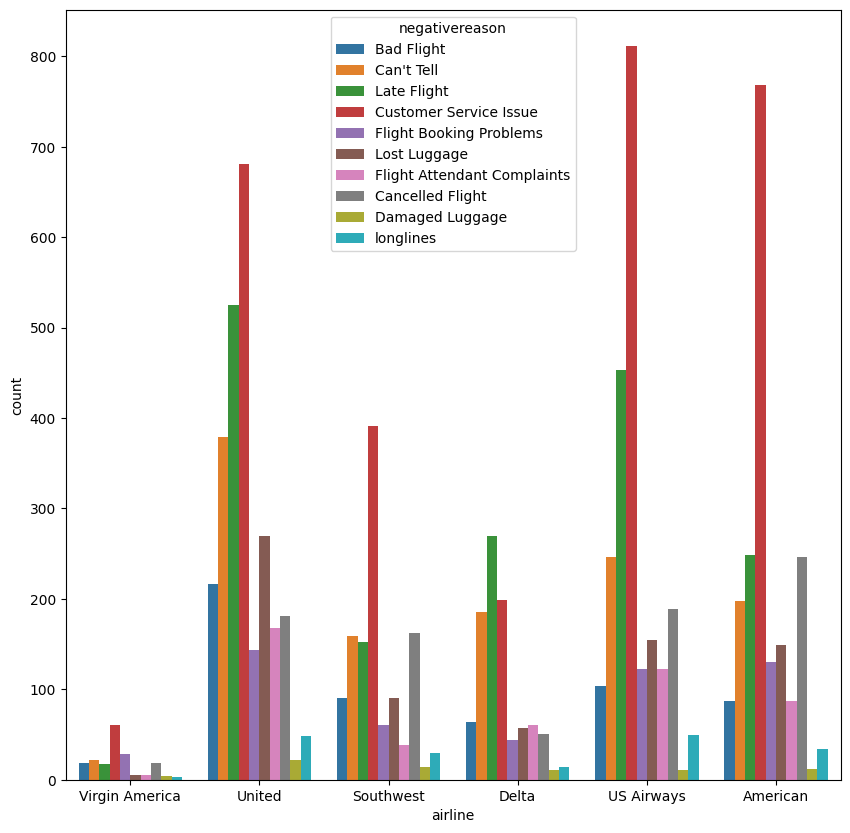

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(df, x="airline", hue="negativereason")

##Sentiment confidence mean per sentiment per airline

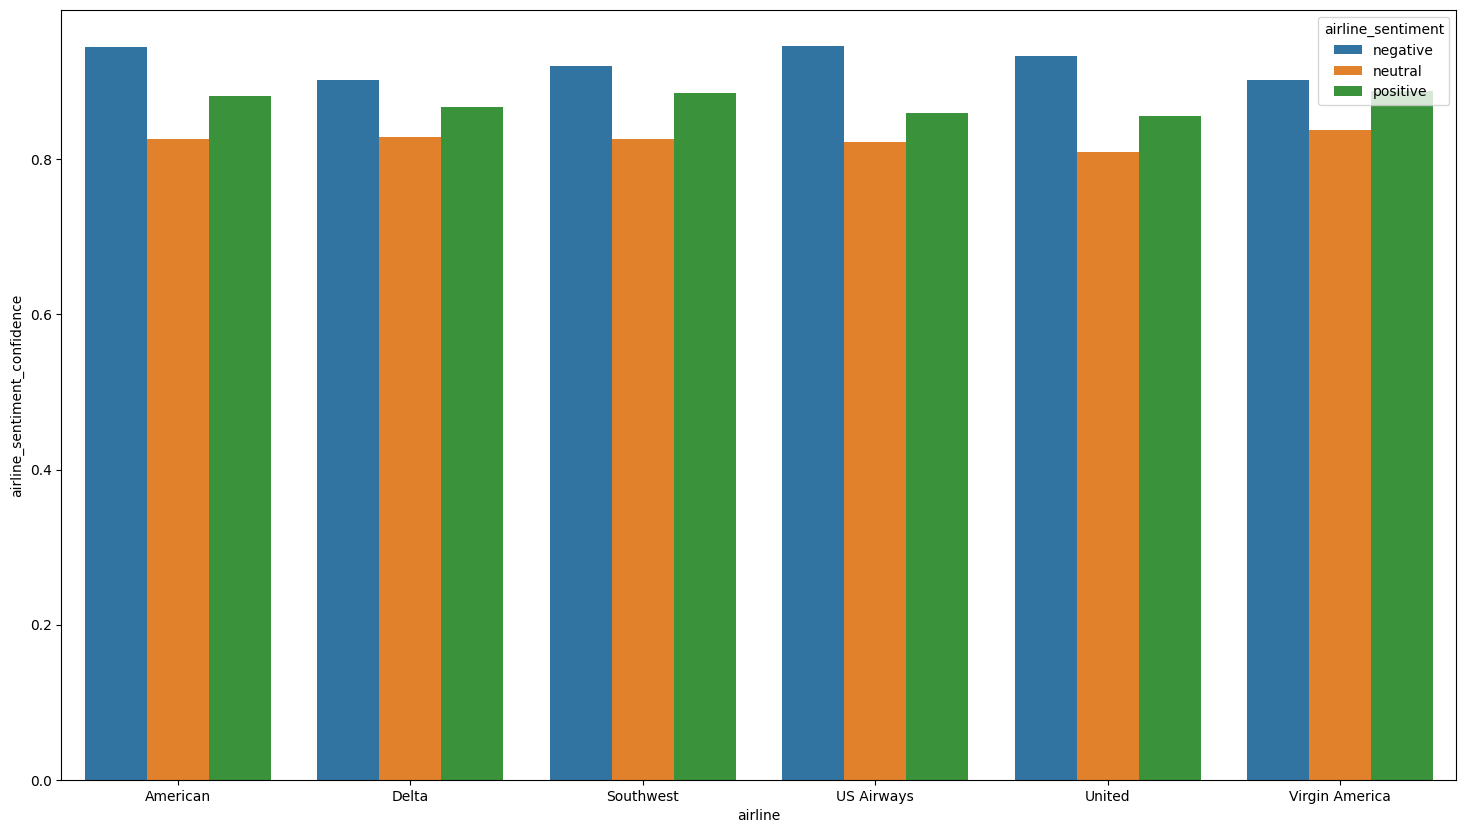

In [ ]:
df_grouped_1 = df.groupby(["airline", "airline_sentiment"])["airline_sentiment_confidence"].mean().reset_index()
plt.figure(figsize=(18,10))
ax = sns.barplot(x="airline", y="airline_sentiment_confidence", hue="airline_sentiment", data=df_grouped_1)

#Problem 2

**Analyse crime data to identify patterns, hot spots, and effective prevention strategies.**

Dataset Table_3_Human_Trafficking_Arrests_by_Race_by_State_2022

In [ ]:
path = "/content/Table_3_Human_Trafficking_Arrests_by_Race_by_State_2022.xls"
data = pd.read_excel(path)
data.head()

,State,Act,White,Black or African American,American \nIndian or \nAlaska \nNative,Asian,Native \nHawaiian or \nOther \nPacific \nIslander,Total
0,Alabama,Commercial Sex Acts,4,4,0,0,0,8
1,Alabama,Involuntary Servitude,0,0,0,0,0,0
2,Arizona,Commercial Sex Acts,19,4,0,3,0,26
3,Arizona,Involuntary Servitude,0,0,0,0,0,0
4,California,Commercial Sex Acts,6,19,0,1,0,26


In [ ]:
missing_values = data.isnull().sum()
unique_states = data['State'].unique()
unique_acts = data['Act'].unique()

In [ ]:
total_arrests_by_state = data.groupby('State')['Total'].sum()
total_arrests_by_act = data.groupby('Act')['Total'].sum()
racial_distribution_columns = ['White', 'Black or African American',
                               'American \nIndian or \nAlaska \nNative', 'Asian',
                               'Native \nHawaiian or \nOther \nPacific \nIslander']
racial_distribution = data[racial_distribution_columns].sum()

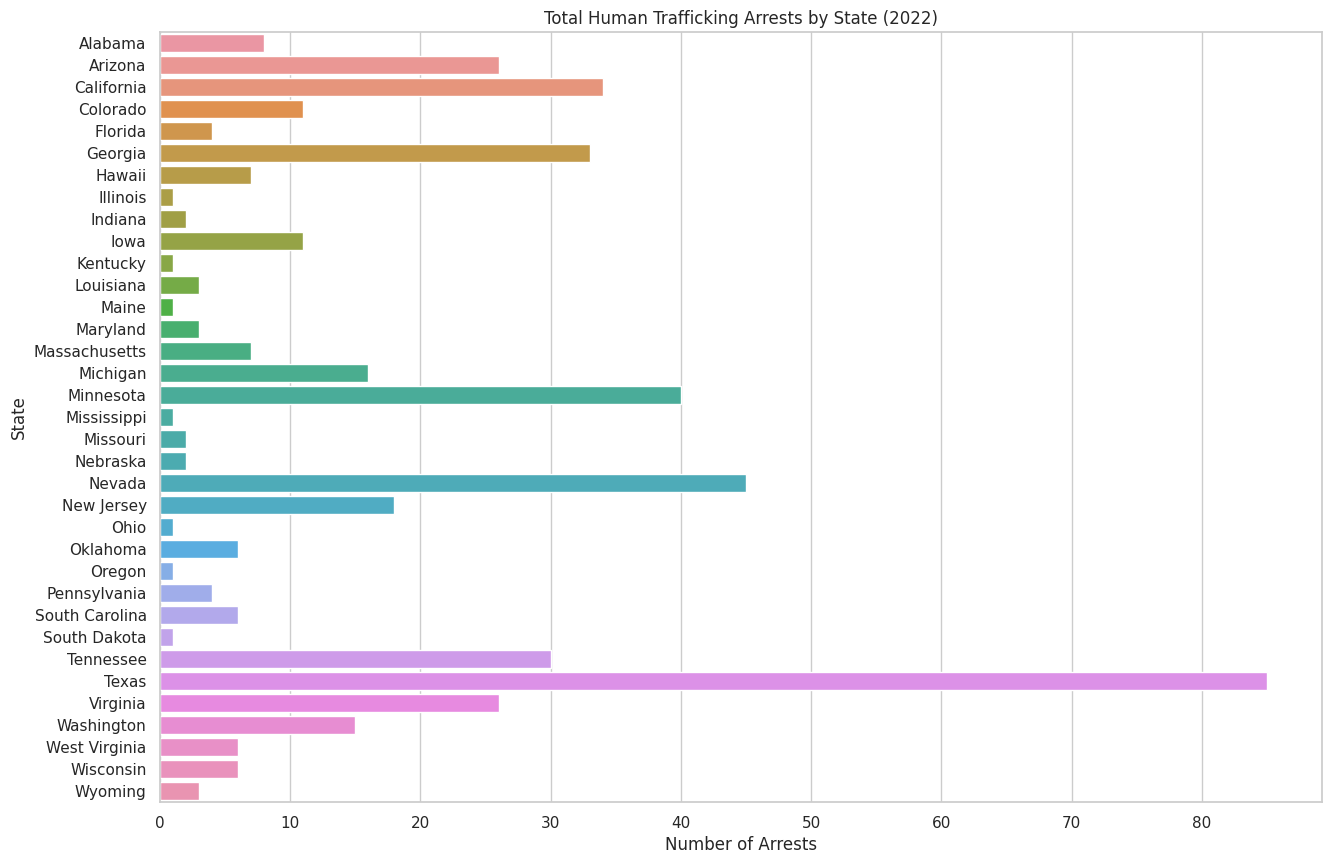

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
total_arrests_by_state_plot = sns.barplot(x=total_arrests_by_state.values, y=total_arrests_by_state.index)
total_arrests_by_state_plot.set_title('Total Human Trafficking Arrests by State (2022)')
total_arrests_by_state_plot.set_xlabel('Number of Arrests')
total_arrests_by_state_plot.set_ylabel('State')
plt.show()


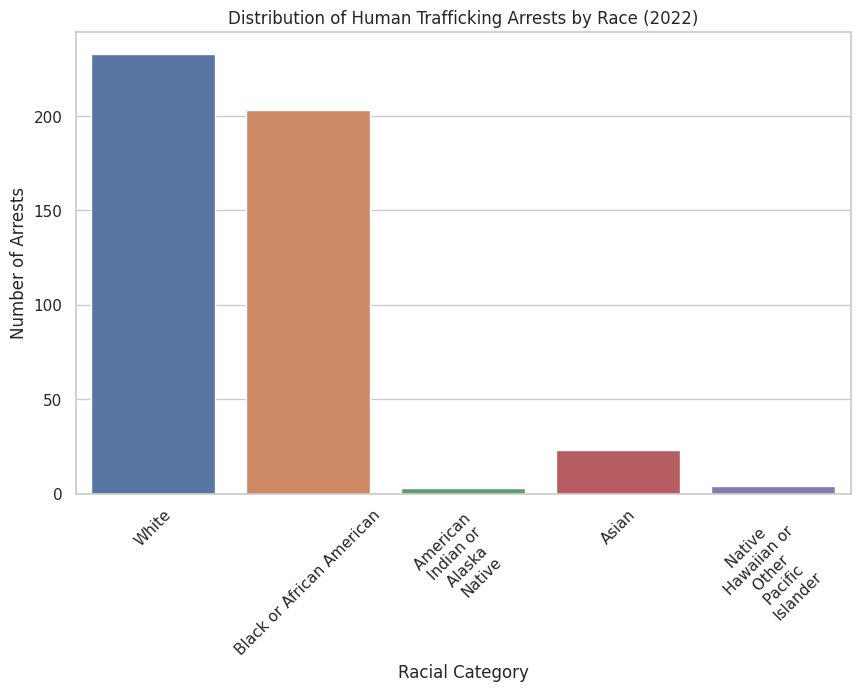

In [ ]:
plt.figure(figsize=(10, 6))
racial_distribution_plot = sns.barplot(x=racial_distribution.index, y=racial_distribution.values)
racial_distribution_plot.set_title('Distribution of Human Trafficking Arrests by Race (2022)')
racial_distribution_plot.set_xlabel('Racial Category')
racial_distribution_plot.set_ylabel('Number of Arrests')
racial_distribution_plot.set_xticklabels(racial_distribution.index, rotation=45)
plt.show()


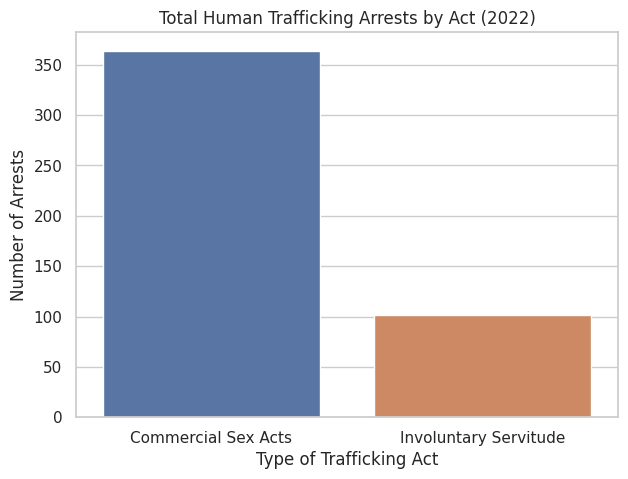

In [ ]:
plt.figure(figsize=(7, 5))
total_arrests_by_act_plot = sns.barplot(x=total_arrests_by_act.index, y=total_arrests_by_act.values)
total_arrests_by_act_plot.set_title('Total Human Trafficking Arrests by Act (2022)')
total_arrests_by_act_plot.set_xlabel('Type of Trafficking Act')
total_arrests_by_act_plot.set_ylabel('Number of Arrests')
plt.show()